# LES Band Azimuthal Angle Model Training
---
Full Environmental Database Model

### Carter J. Humphreys
Email: [chumphre@oswego.edu](mailto:chumphre@oswego.edu) | GitHub:[@HumphreysCarter](https://github.com/HumphreysCarter) | Website: [carterhumphreys.com](http://carterhumphreys.com/)

In [99]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pickle
import joblib 
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error, r2_score 

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Load The Data

In [100]:
# Load dataset
dataPath="../data/full_dataset.csv"
dataset=pd.read_csv(dataPath, header=None)
dataset=dataset.drop([0, 1, 2, 3, 4, 5, 6, 7, 9], axis=1)

# Dataset Summary

In [101]:
# shape
print(dataset.shape)

(1145, 325)


In [102]:
# head
print(dataset.head(5))

         8      10   11   12   13      14    15     16    17     18   ...  \
0  95.175078  13.26  0.0  0.0  0.0  803.81 -2.83  74.37  6.59 -15.85  ...   
1  95.400996  13.26  0.0  0.0  0.0  804.51 -1.72  68.59  7.45 -15.29  ...   
2  96.200389  13.26  0.0  0.0  0.0  810.72 -1.56  64.15  7.17 -16.18  ...   
3  96.285512  13.26  0.0  0.0  0.0  816.24 -1.11  58.38  7.55 -17.10  ...   
4  93.124002  13.26  0.0  0.0  0.0  817.79 -1.43  66.92  6.55 -15.72  ...   

       324    325    326    327    328      329    330    331    332   333  
0  2923.61 -13.54  15.11  26.70  -7.37  5401.54 -29.67  25.71  38.48 -1.77  
1  2927.03 -14.12  14.21  27.32  -9.45  5399.77 -30.21  25.77  37.47 -3.50  
2  2927.59 -14.74  23.99  20.99 -11.98  5396.19 -30.40  24.93  37.17 -5.82  
3  2934.41 -15.24  33.86  17.20 -14.21  5399.68 -30.47  20.28  37.19 -4.76  
4  2937.42 -15.73  38.57  19.43 -12.18  5401.98 -30.02  15.75  37.58 -2.74  

[5 rows x 325 columns]


In [103]:
# descriptions
print(dataset.describe())

               8            10           11           12           13   \
count  1145.000000  1145.000000  1145.000000  1145.000000  1145.000000   
mean     93.641756     4.608821     4.733284    19.422943    23.082725   
std      22.816799     2.408046     6.983989    23.370011    32.730655   
min      48.341748     1.350000     0.000000     0.000000     0.000000   
25%      78.997491     2.820000     0.070000     0.350000     0.000000   
50%      89.729152     3.970000     0.930000    10.440000     2.950000   
75%     105.391728     6.140000     8.160000    33.500000    46.790000   
max     190.940376    13.260000    24.930000    88.300000    95.120000   

               14           15           16           17           18   ...  \
count  1145.000000  1145.000000  1145.000000  1145.000000  1145.000000  ...   
mean    732.873624    -9.868769    77.506498    20.245572     5.926253  ...   
std      58.765264     5.070765    13.388327     8.380371    10.643265  ...   
min     593.05000

# Algorithms

In [104]:
# Split-out validation dataset
array = dataset.values
X = array[:,1:326]
y = array[:,0:1]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)
print(y)
print(X)

[[ 95.17507781]
 [ 95.40099588]
 [ 96.20038855]
 ...
 [ 93.86628409]
 [120.28063776]
 [113.06976448]]
[[13.26  0.    0.   ... 25.71 38.48 -1.77]
 [13.26  0.    0.   ... 25.77 37.47 -3.5 ]
 [13.26  0.    0.   ... 24.93 37.17 -5.82]
 ...
 [ 2.23  4.63 19.43 ... 12.6  34.36  4.09]
 [ 2.23  4.63 19.43 ... 14.08 36.31 -0.16]
 [ 2.23  4.63 19.43 ... 17.43 38.78 -4.31]]


In [105]:
# Spot Check Algorithms
models = []
models.append(('MultiLR', LinearRegression()))
models.append(('KNN(n=2)', KNeighborsRegressor(n_neighbors=2)))
models.append(('KNN(n=5)', KNeighborsRegressor(n_neighbors=5)))
#models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
#models.append(('MLPR', MLPRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=5, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold)
    if name != 'MultiLR': # Hide MultiLR since data is skewed 
        results.append(cv_results)
        names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

MultiLR: 0.468065 (0.080974)
KNN(n=2): 0.707921 (0.048312)
KNN(n=5): 0.628068 (0.080386)


/usr/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

RandomForest: 0.626419 (0.029035)


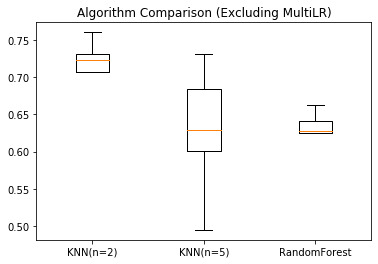

In [106]:
# Compare Algorithms
pyplot.boxplot(results, labels=names, showfliers=False)
pyplot.title('Algorithm Comparison (Excluding MultiLR)')
pyplot.show()

# Predictions and Validation

==================== MultiLR ====================


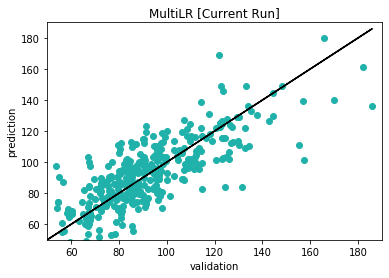

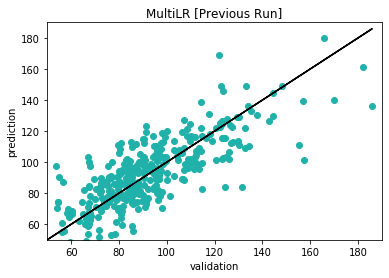

Metric			Curr Score		Prev Score
----------		---------		--------
max_error		56.00092139227985	56.00092139227985
mean_absolute_error	11.588451556514343	11.588451556514343
mean_squared_error	225.18261691226922	225.18261691226922
r2_score		0.5590192444600064	0.5590192444600064


==================== KNN(n=2) ====================


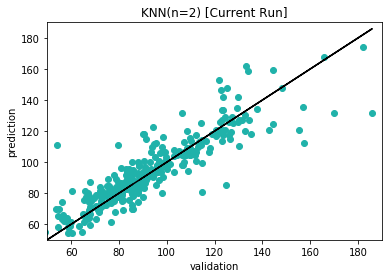

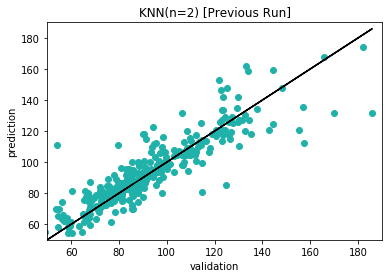

Metric			Curr Score		Prev Score
----------		---------		--------
max_error		56.5358204521758	56.5358204521758
mean_absolute_error	6.729100213777355	6.729100213777355
mean_squared_error	111.80515245156698	111.80515245156698
r2_score		0.7810491712130475	0.7810491712130475


==================== KNN(n=5) ====================


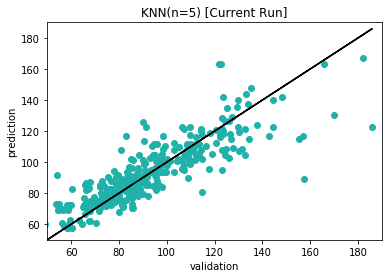

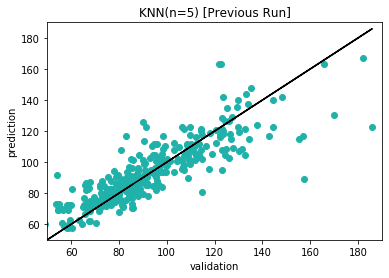

Metric			Curr Score		Prev Score
----------		---------		--------
max_error		68.50662178359595	68.50662178359595
mean_absolute_error	8.09057491906873	8.09057491906873
mean_squared_error	145.97334851304288	145.97334851304288
r2_score		0.7141367375570404	0.7141367375570404


==================== RandomForest ====================


/usr/lib/python3.7/site-packages/IPython/kernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


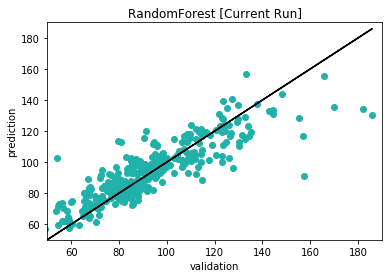

/usr/lib/python3.7/site-packages/IPython/kernel/__main__.py:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


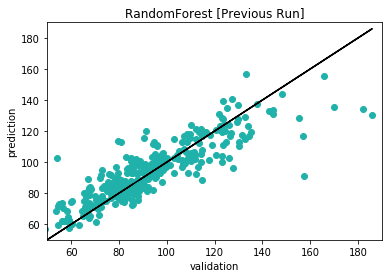

Metric			Curr Score		Prev Score
----------		---------		--------
max_error		66.62380458315484	58.223954765174014
mean_absolute_error	8.059281585807467	8.352555348061022
mean_squared_error	134.6440983199494	138.7371924789427
r2_score		0.7363230918074593	0.7283074830563078
Saving model...




In [107]:
for name, model in models:
    print(f'==================== {name} ====================') 
    
    # Make predictions on validation dataset
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    
    # Evaluate current model
    currMaxError=max_error(Y_validation, predictions)
    currAbsError=mean_absolute_error(Y_validation, predictions)
    currMeanSqrError=mean_squared_error(Y_validation, predictions)
    currR2score=r2_score(Y_validation, predictions)
    
    pyplot.plot(Y_validation, Y_validation, color='black')
    pyplot.scatter(Y_validation, predictions, marker='o', color='lightseagreen');
    pyplot.title(f'{name} [Current Run]')
    pyplot.xlabel("validation")
    pyplot.ylabel("prediction")
    pyplot.xlim(50, 190)
    pyplot.ylim(50, 190)
    pyplot.show()    
    
    # Load previous model and make predictions on validation dataset
    previousModel=joblib.load(f'../models/LES_Band_Position_Model_{name}_Az')  
    previousModel.fit(X_train, Y_train)
    prevPredictions=previousModel.predict(X_validation)
    
    # Evaluate previous model
    prevMaxError=max_error(Y_validation, prevPredictions)
    prevAbsError=mean_absolute_error(Y_validation, prevPredictions)
    prevMeanSqrError=mean_squared_error(Y_validation, prevPredictions)
    prevR2score=r2_score(Y_validation, prevPredictions)

    pyplot.plot(Y_validation, Y_validation, color='black')
    pyplot.scatter(Y_validation, predictions, marker='o', color='lightseagreen');
    pyplot.title(f'{name} [Previous Run]')
    pyplot.xlabel("validation")
    pyplot.ylabel("prediction")
    pyplot.xlim(50, 190)
    pyplot.ylim(50, 190)
    pyplot.show()
    
    print('Metric\t\t\tCurr Score\t\tPrev Score')
    print('----------\t\t---------\t\t--------')
    print(f'max_error\t\t{currMaxError}\t{prevMaxError}')
    print(f'mean_absolute_error\t{currAbsError}\t{prevAbsError}')
    print(f'mean_squared_error\t{currMeanSqrError}\t{prevMeanSqrError}')
    print(f'r2_score\t\t{currR2score}\t{prevR2score}')

    # Save model if r^2 better
    if currR2score > prevR2score:
        print('Saving model...')
        joblib.dump(model, f'../models/LES_Band_Position_Model_{name}_Az') 
    print('\n')

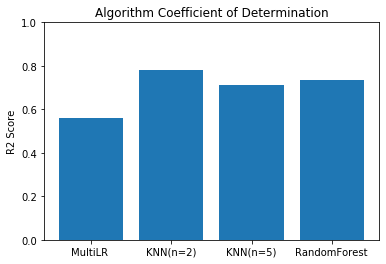

In [111]:
pyplot.title(f'Algorithm Coefficient of Determination')
pyplot.ylabel("R2 Score")  
langs = ['MultiLR ', 'KNN(n=2)', 'KNN(n=5)', 'RandomForest',]
students = [0.5590192444600064, 0.7810491712130475, 0.7141367375570404, 0.7363230918074593]
pyplot.bar(langs,students)
pyplot.ylim(0.0, 1.0)
pyplot.show()